#### Aim: Analyzing user preferences, app performance, market trends, monetization strategies, competition in the Google Play Store to provide actionable insights for developers

### 1. Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/jyoti/OneDrive/Desktop/EduTech/Numpy/googleplaystore.csv")

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
df['Category'].nunique()

34

In [9]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
df['Category'].value_counts()             #for categorical data

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

### 2. Handling Missing Values 

In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [12]:
#Drop null values of Type, Content Rating, Android Ver, Current Ver as they have less missing values.
drop_columns = ['Type', 'Content Rating', 'Android Ver','Current Ver']
df.dropna(axis=0, subset= drop_columns, inplace=True)

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [14]:
"""Here, Rating values have 1458 missing values. Means from 10841 values about 13.59% values are missing in Rating columns.

Here, it is not a good practice to drop missing values as we have large missing values.
Because if we drop null values We will loose many information of data."""

'Here, Rating values have 1458 missing values. Means from 10841 values about 13.59% values are missing in Rating columns.\n\nHere, it is not a good practice to drop missing values as we have large missing values.\nBecause if we drop null values We will loose many information of data.'

In [15]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


### 3. Data Cleaning

In [16]:
df.loc[df.App=='Tiny Scanner - PDF Scanner App']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
231,Tiny Scanner - PDF Scanner App,BUSINESS,4.7,286897,39M,"10,000,000+",Free,0,Everyone,Business,"May 30, 2017",1.2.6,3.0 and up
287,Tiny Scanner - PDF Scanner App,BUSINESS,4.7,286897,39M,"10,000,000+",Free,0,Everyone,Business,"May 30, 2017",1.2.6,3.0 and up


In [17]:
df.loc[df.App=='ZOOM Cloud Meetings']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


In [18]:
df[df.duplicated(keep='first')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


Drop duplicates

In [19]:
df.drop_duplicates(subset='App', inplace=True)          # 1181 

In [20]:
df.shape

(9648, 13)

In [21]:
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [22]:
print('Number of apps in the dataset : ' , len(df))
df.sample(7)

Number of apps in the dataset :  9648


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3680,Music - Mp3 Player,VIDEO_PLAYERS,4.4,259605,3.1M,"10,000,000+",Free,0,Everyone,Video Players & Editors,"August 3, 2018",1.6.1,4.0.3 and up
4708,Mental Hospital V,GAME,4.2,2460,25M,"50,000+",Paid,$0.99,Mature 17+,Action,"November 19, 2016",1.04,4.2 and up
1545,SAMSUNG RETAILMODE 2018,LIBRARIES_AND_DEMO,4.3,6,5.5M,"10,000+",Free,0,Everyone,Libraries & Demo,"August 3, 2018",8.0.20180212,4.2 and up
4117,Inputting Plus: Ctrl + Z/F/C/V,PRODUCTIVITY,4.2,1117,3.0M,"50,000+",Free,0,Everyone,Productivity,"October 18, 2017",1.0.6,5.0 and up
150,English Grammar Complete Handbook,BOOKS_AND_REFERENCE,4.6,1435,2.8M,"500,000+",Free,0,Everyone,Books & Reference,"January 21, 2018",1,4.0 and up
1993,Jewels classic Prince,GAME,4.4,47644,15M,"5,000,000+",Free,0,Everyone,Puzzle,"June 15, 2018",2.4.2,4.0 and up
5110,Wind & Weather Meter for Ag,WEATHER,NaN,3,14M,"1,000+",Free,0,Everyone,Weather,"March 14, 2016",v1.0,4.3 and up


In [23]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [24]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [25]:
df['Size']=df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [26]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [27]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [28]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          8190 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [30]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8190.000000,9.648000e+03,8422.000000,9.648000e+03,9648.000000
mean,4.173321,2.168369e+05,20.413946,7.786211e+06,1.100193
std,0.536691,1.832349e+06,21.833132,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,28.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [31]:
#Maximum Prize of an app is 400.
#Prize suggest that 75% of the apps are Free. As third quantile is zero.

### 4. Exploratory Data Analysis

<AxesSubplot:xlabel='Rating', ylabel='count'>

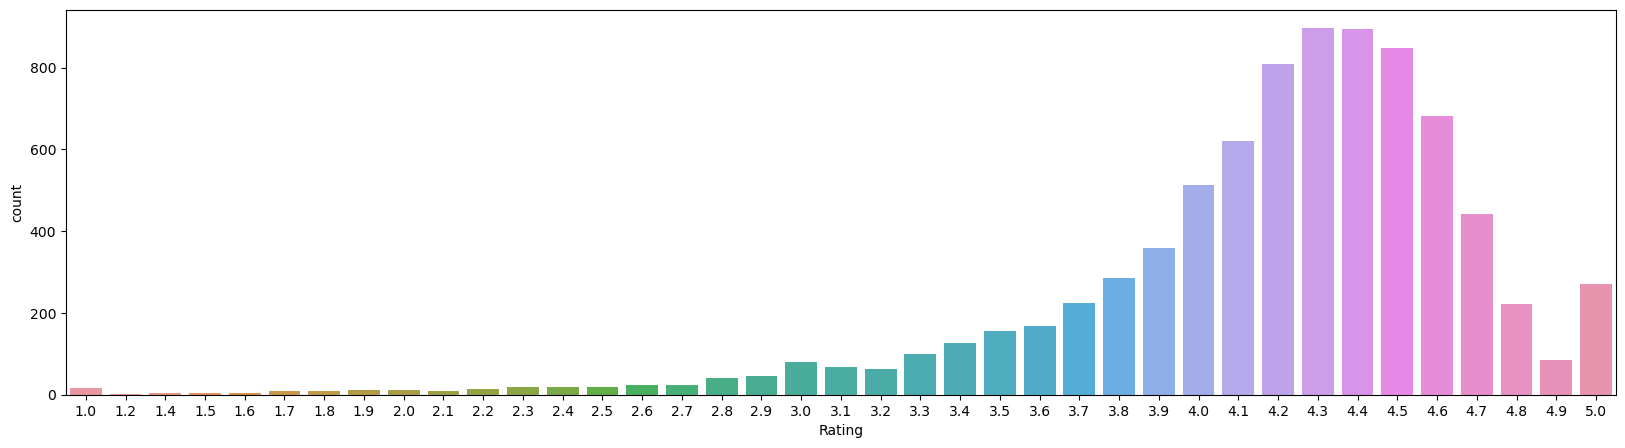

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(x ='Rating', data=df, )

In [33]:
df.Rating.value_counts()

4.3    897
4.4    894
4.5    847
4.2    809
4.6    683
4.1    620
4.0    512
4.7    442
3.9    359
3.8    286
5.0    271
3.7    224
4.8    221
3.6    167
3.5    156
3.4    126
3.3    100
4.9     85
3.0     81
3.1     69
3.2     62
2.9     45
2.8     40
2.6     24
2.7     23
2.5     20
2.3     20
2.4     19
1.0     16
2.2     14
2.0     12
1.9     11
1.7      8
1.8      8
2.1      8
1.6      4
1.4      3
1.5      3
1.2      1
Name: Rating, dtype: int64

#### Which type of categories are more in google playstore?

<AxesSubplot:xlabel='Category', ylabel='Category'>

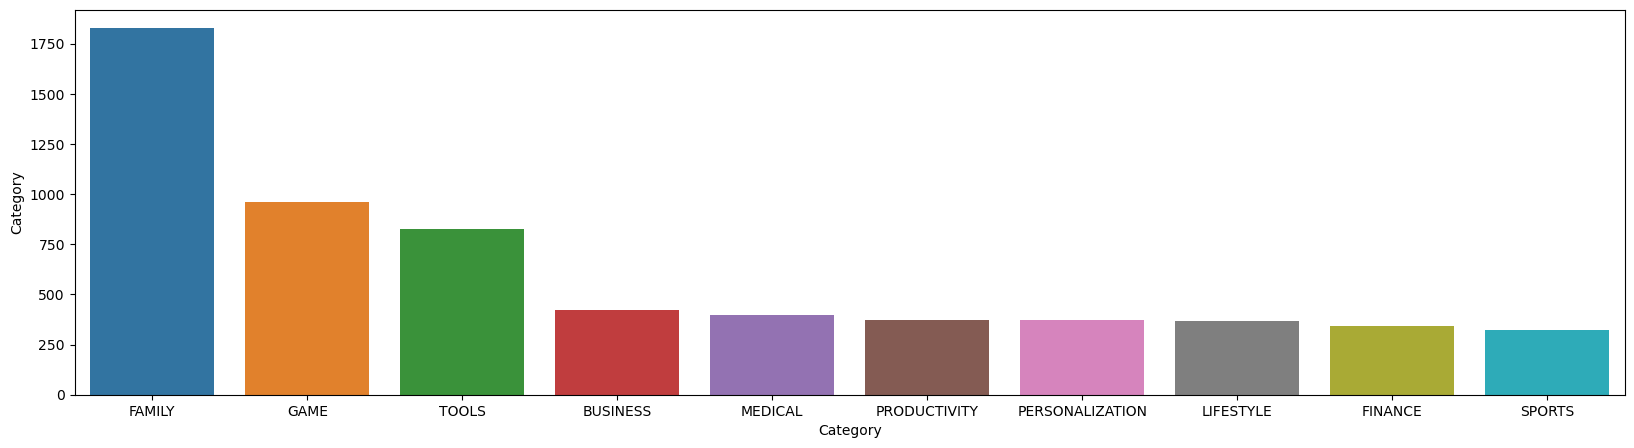

In [34]:
# get the top 10 category

top_10_category = df['Category'].value_counts().head(10)
top_10_category
#df_category15 = top_15_category.sort_values(by=['App'],ascending=False).head(15)
#df_category15
plt.figure(figsize=(20,5))
plt.xlabel('Category')
sns.barplot(x=top_10_category.index,y=top_10_category[:])


In [35]:
#Family and Game apps have the highest market prevelance.
#Tools, Business and Medical apps are also catching up.

<AxesSubplot:title={'center':'6 Lower Categories'}, xlabel='Category', ylabel='Category'>

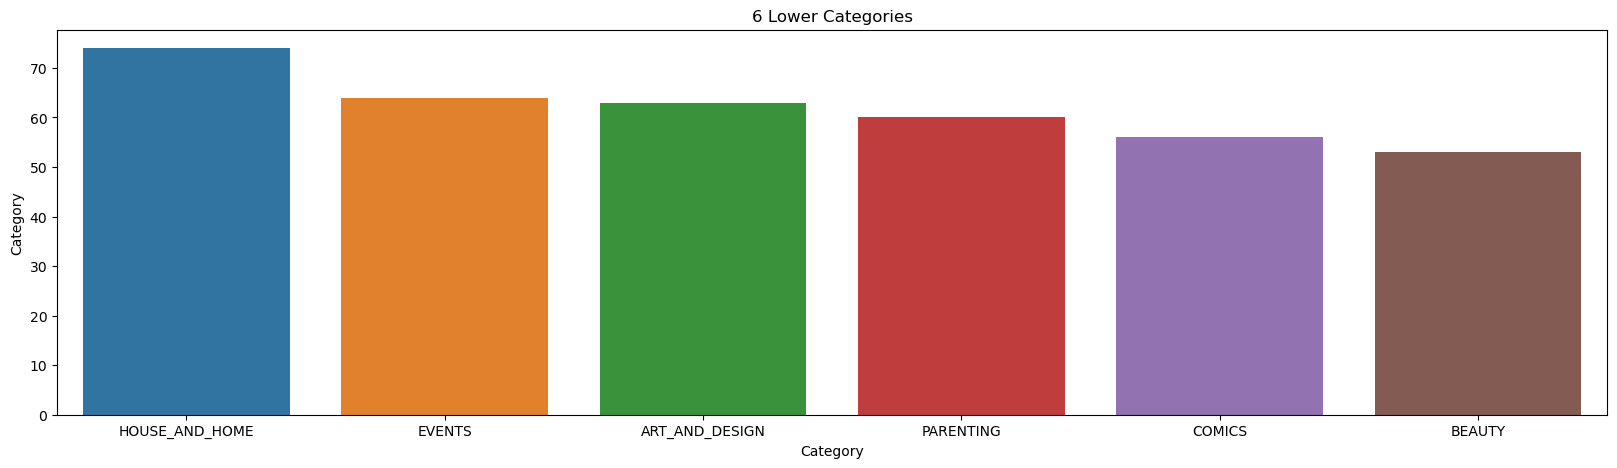

In [36]:
# get the below 10 category

below_10_category = df['Category'].value_counts().tail(6)
below_10_category
#df_category15 = top_15_category.sort_values(by=['App'],ascending=False).head(15)
#df_category15
plt.figure(figsize=(20,5))
plt.xlabel('Category')
plt.title('6 Lower Categories')
sns.barplot(x=below_10_category.index,y=below_10_category[:])

In [37]:
top_5_apps_per_category = df.groupby('Category')['App'].apply(lambda x: x.head(5)).reset_index(drop=True)

# Print the result
print(top_5_apps_per_category)

0         Photo Editor & Candy Camera & Grid & ScrapBook
1                                    Coloring book moana
2      U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                  Sketch - Draw & Paint
4                  Pixel Draw - Number Art Coloring Book
                             ...                        
160    The Weather Channel: Rain Forecast & Storm Alerts
161                                     Weather forecast
162    AccuWeather: Daily Forecast & Live Weather Rep...
163                                     Live Weather Pro
164      Weather by WeatherBug: Forecast, Radar & Alerts
Name: App, Length: 165, dtype: object


In [38]:
top_5_apps_per_category_df = top_5_apps_per_category.to_frame()

# Print the DataFrame
print(top_5_apps_per_category_df)

                                                   App
0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
..                                                 ...
160  The Weather Channel: Rain Forecast & Storm Alerts
161                                   Weather forecast
162  AccuWeather: Daily Forecast & Live Weather Rep...
163                                   Live Weather Pro
164    Weather by WeatherBug: Forecast, Radar & Alerts

[165 rows x 1 columns]


In [39]:
top_5_apps_per_category = df.groupby('Category')['App'].head(5)

# Print the result
print(top_5_apps_per_category)

0          Photo Editor & Candy Camera & Grid & ScrapBook
1                                     Coloring book moana
2       U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                   Sketch - Draw & Paint
4                   Pixel Draw - Number Art Coloring Book
                              ...                        
3820    Waze - GPS, Maps, Traffic Alerts & Live Naviga...
3821                    T map (te map, T map, navigation)
3822         MapQuest: Directions, Maps, GPS & Navigation
3823    Yahoo! transit guide free timetable, operation...
3824    乗換NAVITIME　Timetable & Route Search in Japan T...
Name: App, Length: 165, dtype: object


In [40]:
categories = df['Category'].unique()

# Loop through each category
for category in categories:
    # Filter the DataFrame to include only the current category
    category_df = df[df['Category'] == category]
    
    # Get the top 5 apps for the current category
    top_5_apps = category_df['App'].head(5).tolist()
    
    # Print the category and its top 5 apps
    print("Category:", category)
    print("Top 5 Apps:")
    for app in top_5_apps:
        print(app)
    print()

Category: ART_AND_DESIGN
Top 5 Apps:
Photo Editor & Candy Camera & Grid & ScrapBook
Coloring book moana
U Launcher Lite – FREE Live Cool Themes, Hide Apps
Sketch - Draw & Paint
Pixel Draw - Number Art Coloring Book

Category: AUTO_AND_VEHICLES
Top 5 Apps:
Monster Truck Stunt 3D 2019
Real Tractor Farming
Ultimate F1 Racing Championship
Used Cars and Trucks for Sale
American Muscle Car Race

Category: BEAUTY
Top 5 Apps:
Hush - Beauty for Everyone
ipsy: Makeup, Beauty, and Tips
Natural recipes for your beauty
BestCam Selfie-selfie, beauty camera, photo editor
Mirror - Zoom & Exposure -

Category: BOOKS_AND_REFERENCE
Top 5 Apps:
Wattpad 📖 Free Books
E-Book Read - Read Book for free
Download free book with green book
Wikipedia
Amazon Kindle

Category: BUSINESS
Top 5 Apps:
Visual Voicemail by MetroPCS
Indeed Job Search
Uber Driver
ADP Mobile Solutions
Snag - Jobs Hiring Now

Category: COMICS
Top 5 Apps:
LINE WEBTOON - Free Comics
Manga Master - Best manga & comic reader
GANMA! - All original

<AxesSubplot:xlabel='Type', ylabel='count'>

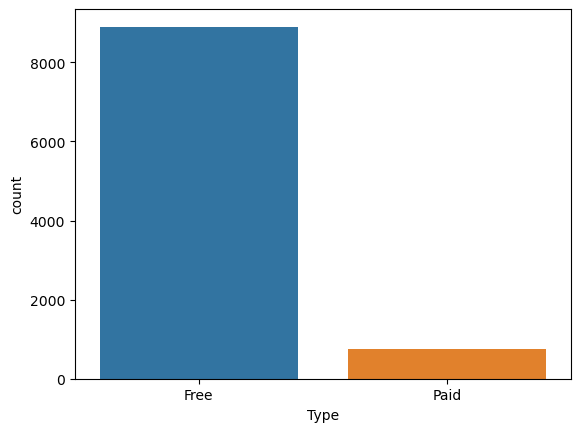

In [80]:
sns.countplot(x = 'Type', data= df)

In [81]:
df['Type'].value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

In [ ]:
#From above we know, 7.3% apps are Paid.
#Free Apps - 8902
#Paid Apps - 756
#This is a Huge diffrence, Let's see For which category People want to pay, although alternative free app is availabel.

<AxesSubplot:ylabel='Category'>

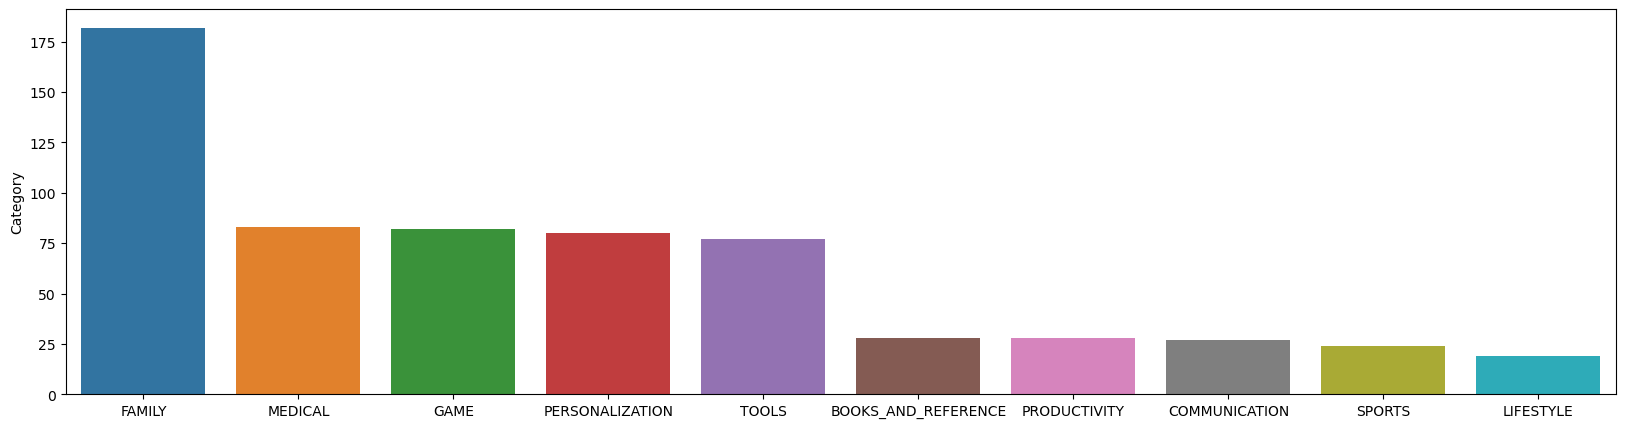

In [97]:
new_df = df[df['Type']== 'Paid']

plt.figure(figsize=(20,5))
sns.barplot(x = new_df['Category'].value_counts().head(10).index, y = new_df['Category'].value_counts().head(10))


# Here we notice, who want to pay for apps.
#If it is under this categories, There are high chance that peple will pay for it.

In [98]:
top_10_gener = df['Genres'].value_counts().head(10)

<AxesSubplot:xlabel='Geners', ylabel='Genres'>

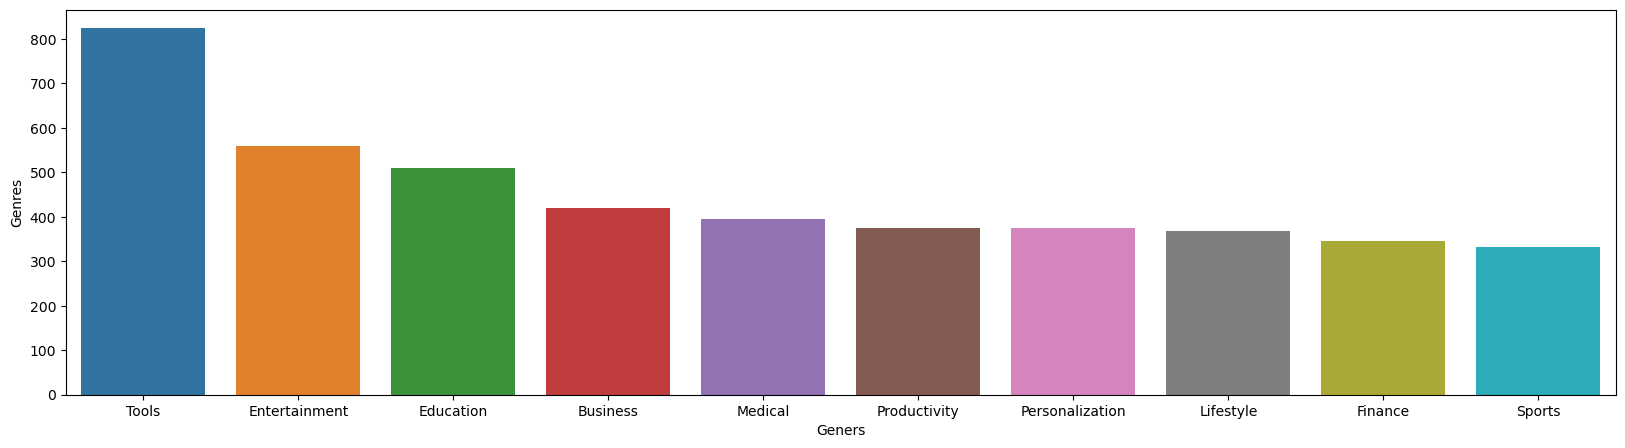

In [99]:
# Top ten geners are listed above let's plot them
plt.figure(figsize=(20,5))
plt.xlabel('Geners')
sns.barplot(x=top_10_gener.index, y= top_10_gener[:])

#### Average rating of apps

<AxesSubplot:xlabel='Rating', ylabel='Count'>

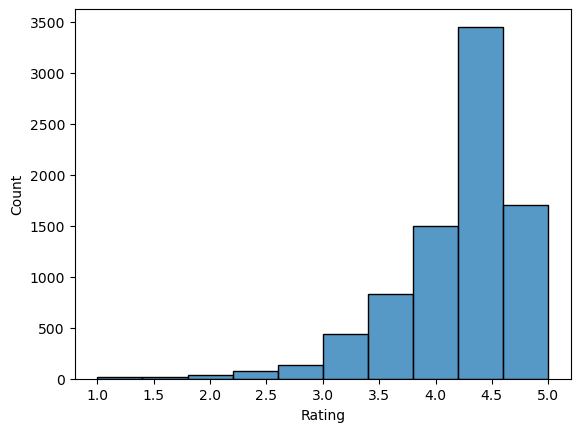

In [43]:
sns.histplot(df['Rating'],bins=10)

In [102]:
print('Average app rating = ', np.mean(df['Rating']))    #Generally, most apps do well with an average rating of 4.17

Average app rating =  4.173321123321126


#### App ratings across categories - One Way Anova Test

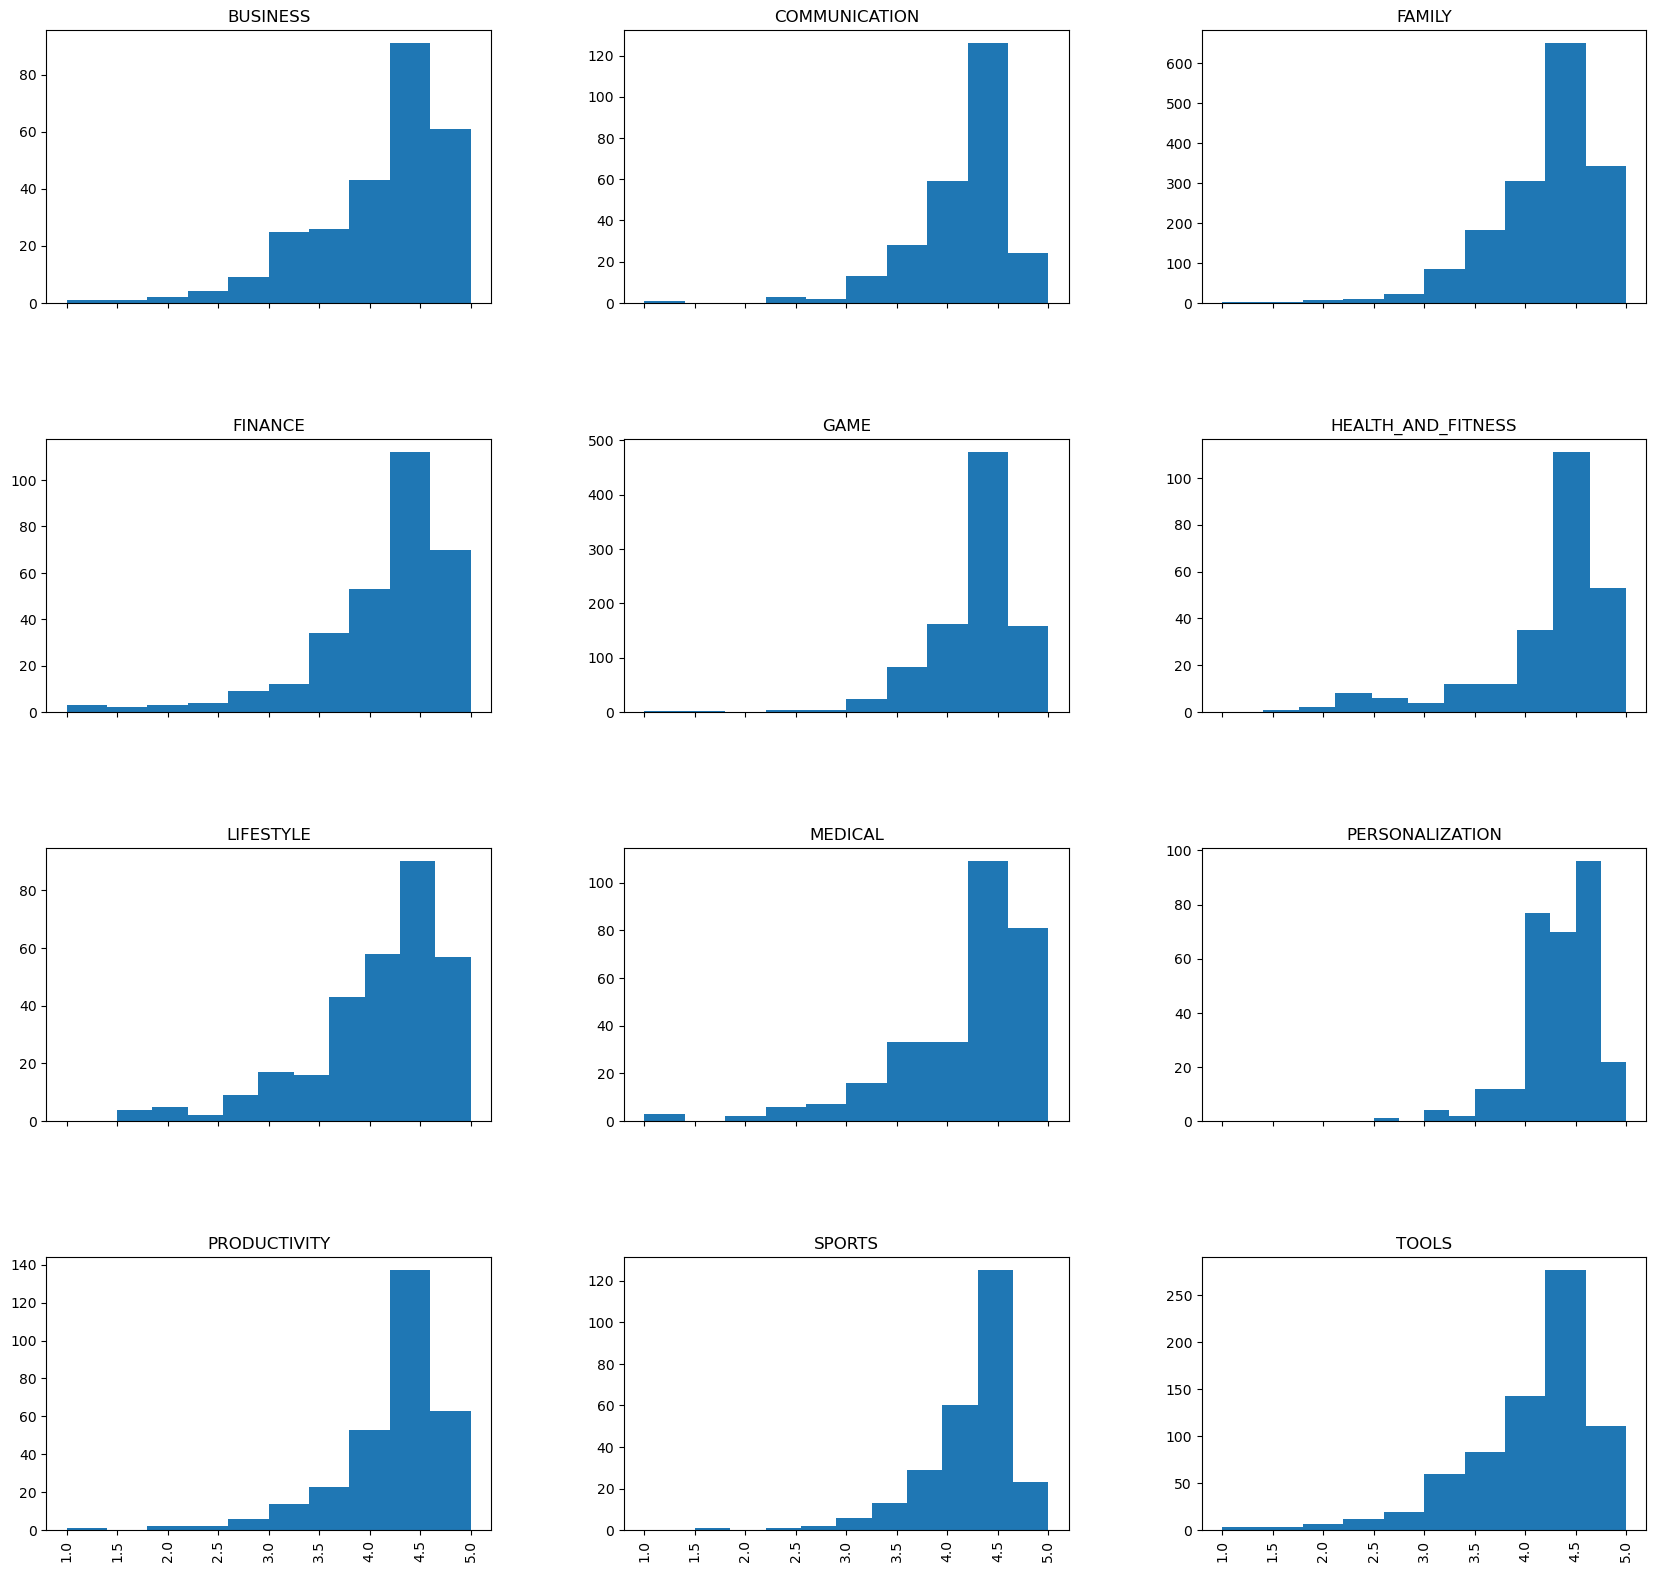

In [104]:
#inspect if we have categories which perform exceptionally good or bad.

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

Almost all app categories perform decently. Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.
A few junk apps also exist in the Lifestyle, Family and Finance category.

<AxesSubplot:title={'center':'6 Lower Categories'}, xlabel='Category', ylabel='Category'>

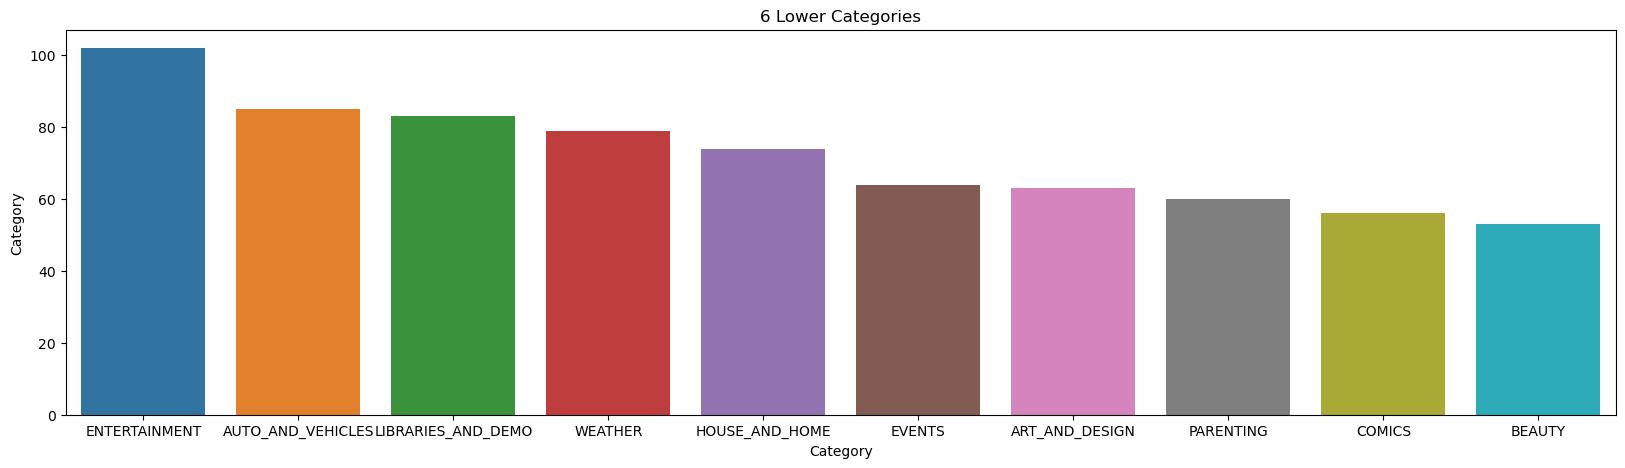

In [108]:
below_10_category = df['Category'].value_counts().tail(10)
below_10_category
#df_category15 = top_15_category.sort_values(by=['App'],ascending=False).head(15)
#df_category15
plt.figure(figsize=(20,5))
plt.xlabel('Category')
plt.title('6 Lower Categories')
sns.barplot(x=below_10_category.index,y=below_10_category[:])

In [109]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


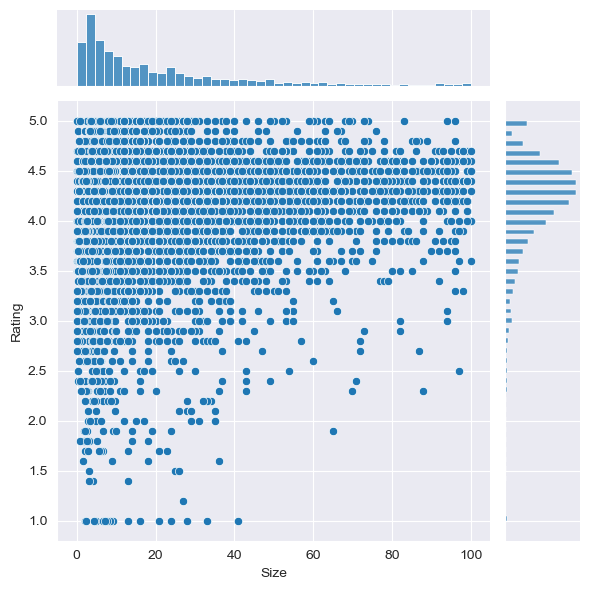

In [113]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

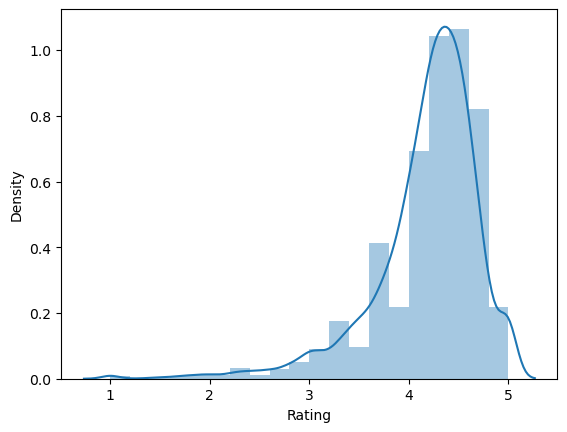

In [46]:
sns.distplot(df['Rating'],bins=20)

In [47]:
df['Rating'].skew()

-1.7439651379389551

<AxesSubplot:xlabel='Price', ylabel='Rating'>

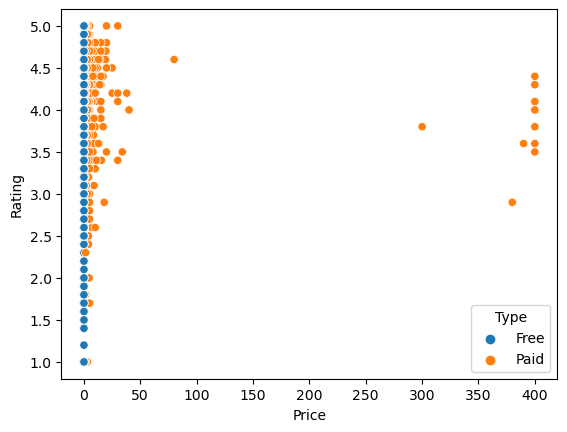

In [64]:
sns.scatterplot(x=df['Price'],y=df['Rating'],hue=df['Type'])

<AxesSubplot:xlabel='Size', ylabel='Rating'>

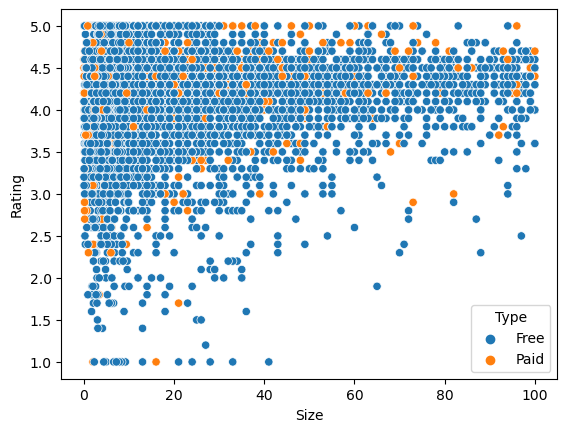

In [66]:
sns.scatterplot(x=df['Size'],y=df['Rating'],hue=df['Type'])

Text(0.5, 1.0, 'App pricing trend across categories')

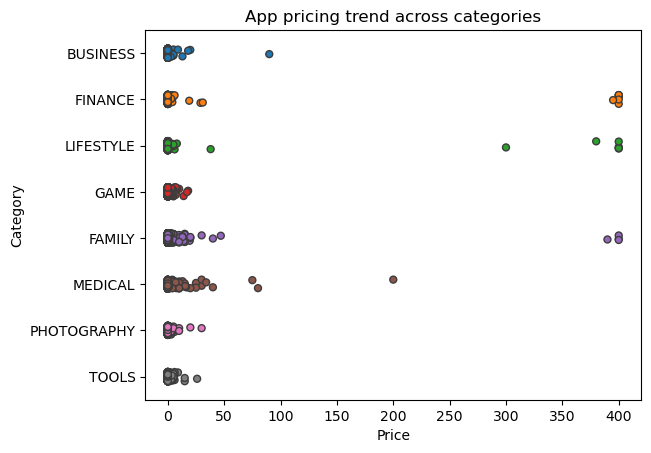

In [68]:
# Select a few popular app categories
popular_app_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], linewidth=1)
ax.set_title('App pricing trend across categories')

Most top rated apps are optimally priced between ~1 𝑡𝑜 30.There are only a very few apps priced above 20$.Clearly, Medical  and Family  apps are the most expensive. Some medical apps extend even upto 80$.All other apps are priced under 30$. All game apps are reasonably priced below 20$

Paid apps have a relatively lower number of downloads than free apps. Majority of the paid apps that are highly rated have small sizes. This means that most paid apps are designed and developed to cater to specific functionalities and hence are not bulky.
Users prefer to pay for apps that are light-weighted. A paid app that is bulky may not perform well in the market.

In [ ]:
""" 11 app monetization strategy: Advertising, Subscriptions, Selling Merchandise, 
In-App Purchases, Sponsorship, Referral Marketing, Collecting and Selling Data,
Freemium Upsell, Physical Purchases, Transaction Fees, and Crowdfunding"""

#### Exploring Co-relation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


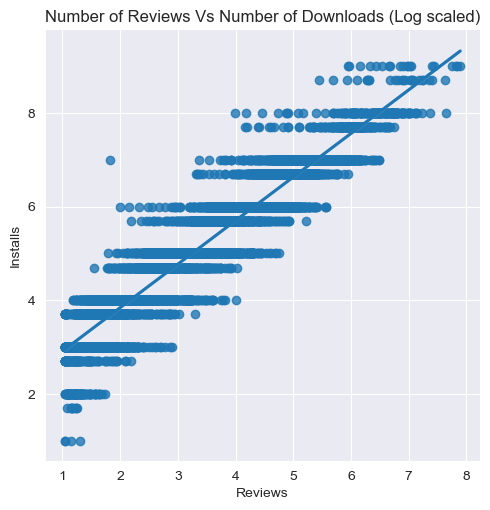

In [114]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

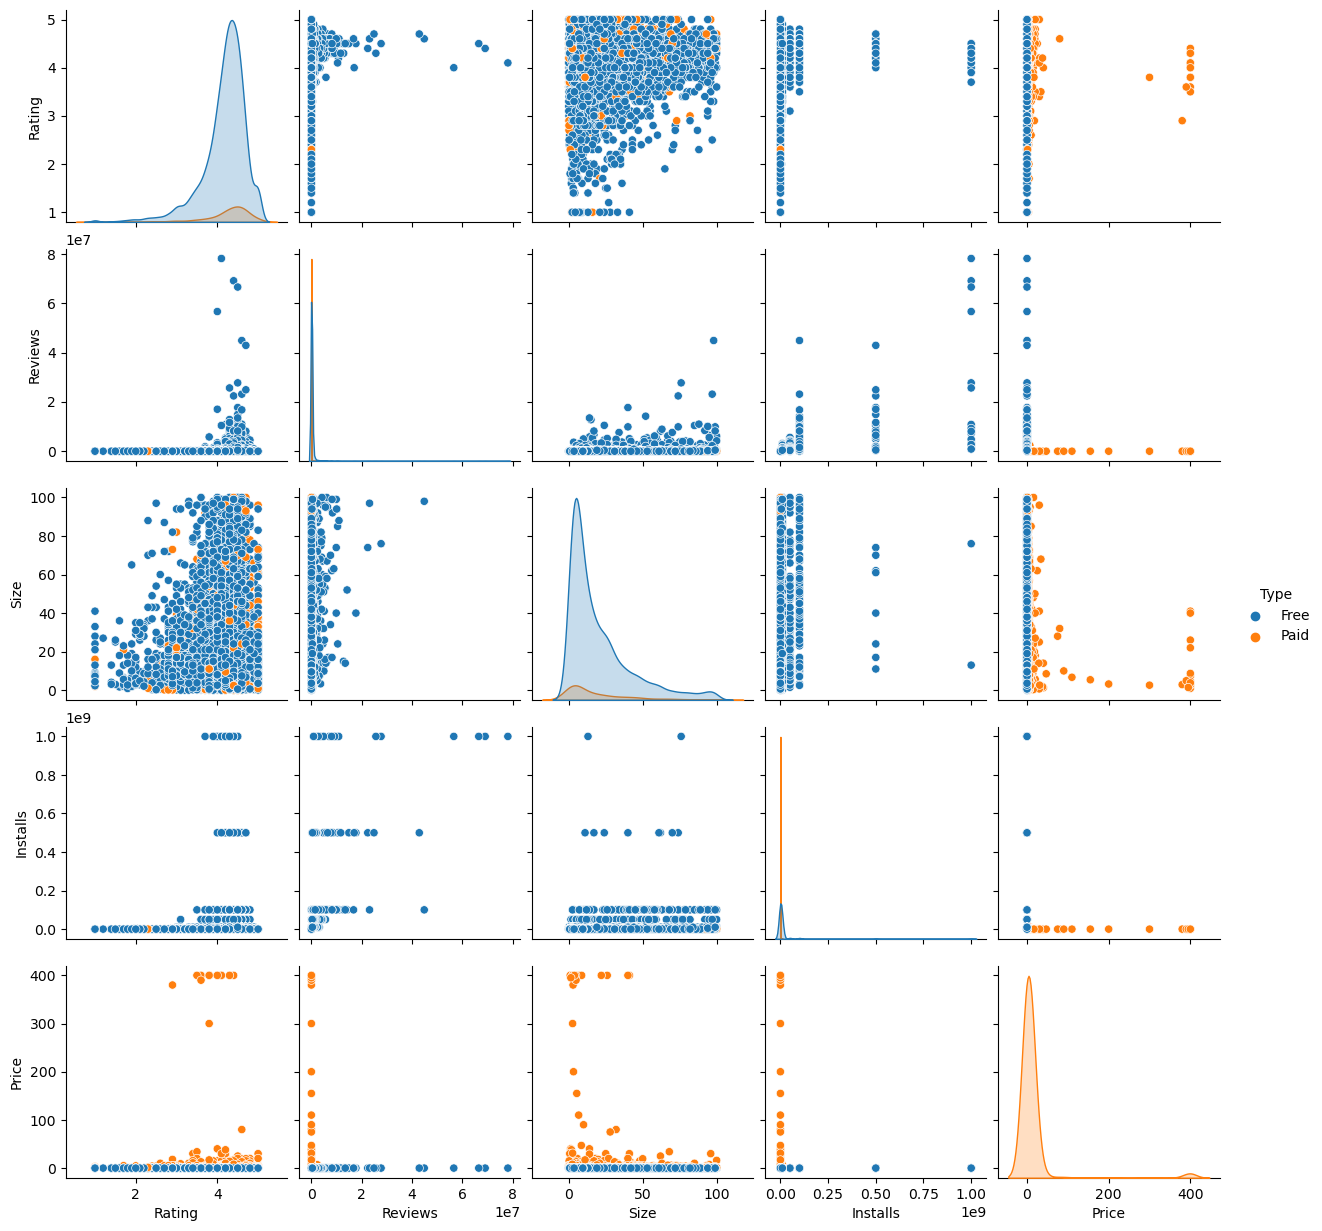

In [68]:
sns.pairplot(df,hue='Type')

 #### Compare Total Installation of google apps and other apps.

In [115]:
# It would be easy as we see in data every google apps contains a word 'Google'.

df_2 = df[df['App'].str.contains('Google')]

In [121]:
market_own_by_google = df_2['Installs'].sum()

In [122]:
market_own_by_others = df['Installs'].sum()- market_own_by_google

([<matplotlib.patches.Wedge at 0x229133e4c70>,
 [Text(-0.9426817076499211, 0.5668784685117517, 'Google'),
  Text(0.9426816545749239, -0.5668785567719808, 'Other')],
 [Text(-0.42849168529541865, 0.2576720311417053, '82.8%'),
  Text(0.4284916611704199, -0.25767207125999125, '17.2%')])

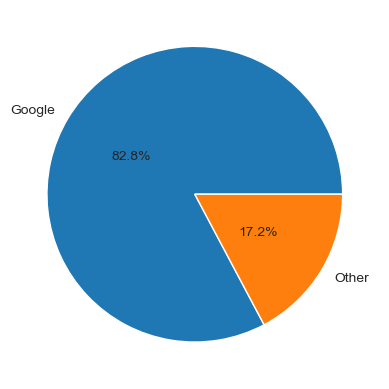

In [123]:
plt.pie(x=[market_own_by_others,market_own_by_google], autopct="%.1f%%", labels=['Google', 'Other'], pctdistance=0.5)

Above graph gives insights about, how google is ruling over the App Market.
It tells from total installs, 80.9% install done for googleApps from PlayStore.
Which might seems like Monopoly of Google.

### Conclusion

Average rating of (active) apps on Google Play Store is 4.17.

Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.

Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

Most of the top rated apps are optimally priced between ~1 𝑡𝑜 30- neither too cheap nor too expensive.

Medical and Family apps are the most expensive and even extend upto 80$.

Users tend to download a given app more if it has been reviewed by a large number of people.

In [41]:
df_sorted = df.sort_values(by=['Category', 'Rating', 'Installs'], ascending=[True, False, False])

# Group the sorted DataFrame by 'Category'
grouped = df_sorted.groupby('Category')

top_5_apps_by_category = grouped.head(5)  # Select the top 5 apps from each category

# Display the top 5 apps from each category
print(top_5_apps_by_category[['Category', 'App', 'Rating', 'Installs']])

            Category                                                App  \
8888  ART_AND_DESIGN            Spring flowers theme couleurs d t space   
3982  ART_AND_DESIGN                                  Cardi B Wallpaper   
25    ART_AND_DESIGN                         Harley Quinn wallpapers HD   
4759  ART_AND_DESIGN  X Launcher Pro - IOS Style Theme & Control Center   
5254  ART_AND_DESIGN                            AJ Styles HD Wallpapers   
...              ...                                                ...   
3627         WEATHER                                   Weather forecast   
3658         WEATHER                                   Weather Live Pro   
3629         WEATHER                                   Live Weather Pro   
3631         WEATHER                         weather - weather forecast   
7491         WEATHER                      Fu*** Weather (Funny Weather)   

      Rating  Installs  
8888     5.0       100  
3982     4.8     50000  
25       4.8     10000  

In [43]:


# Sort the DataFrame by 'Rating' and 'Installs' in descending order
df_sorted = df.sort_values(by=['Rating', 'Installs'], ascending=[False, False])

# Group the DataFrame by 'Category'
grouped = df_sorted.groupby('Category')

# Define a function to get top 5 apps from each category
def top_5_apps(group):
    return group.head(5)

# Apply the function to each group and concatenate the results
top_5_per_category = grouped.apply(top_5_apps)

# Reset the index of the resulting DataFrame
top_5_per_category.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(top_5_per_category)

                                                   App        Category  \
0              Spring flowers theme couleurs d t space  ART_AND_DESIGN   
1                                    Cardi B Wallpaper  ART_AND_DESIGN   
2                           Harley Quinn wallpapers HD  ART_AND_DESIGN   
3    X Launcher Pro - IOS Style Theme & Control Center  ART_AND_DESIGN   
4                              AJ Styles HD Wallpapers  ART_AND_DESIGN   
..                                                 ...             ...   
160                                   Weather forecast         WEATHER   
161                                   Weather Live Pro         WEATHER   
162                                   Live Weather Pro         WEATHER   
163                         weather - weather forecast         WEATHER   
164                      Fu*** Weather (Funny Weather)         WEATHER   

     Rating  Reviews  Size  Installs  Type  Price Content Rating  \
0       5.0        1   2.9       100  Free 

In [46]:
# Assuming df is your DataFrame containing the 'Category', 'Installs', and 'Rating' columns

# Get the unique categories
categories = df['Category'].unique()

# Ask the user for input
preferred_criteria = input("Enter 'installs' or 'rating' to select category based on number of installations or rating: ")

# Check if the user input is valid
if preferred_criteria.lower() not in ['installs', 'rating']:
    print("Invalid input. Please enter 'installs' or 'rating'.")
else:
    # Sort categories based on the preferred criteria
    sorted_categories = df.groupby('Category')[preferred_criteria.capitalize()].mean().sort_values(ascending=False).index.tolist()

    # Print the sorted categories
    print("Sorted categories based on", preferred_criteria + ":")
    print(sorted_categories)
    
    # Ask the user to select a category
    selected_category = input("Enter the category you want to explore: ")

    # Check if the selected category is valid
    if selected_category in categories:
        # Filter the DataFrame to include only the selected category
        selected_category_df = df[df['Category'] == selected_category]

        # Get the top 5 apps for the selected category
        top_5_apps = selected_category_df['App'].head(5).tolist()

        # Print the selected category and its top 5 apps
        print("\nCategory:", selected_category)
        print("Top 5 Apps:")
        for app in top_5_apps:
            print(app)
    else:
        print("Invalid category. Please select from the available categories.")


Enter 'installs' or 'rating' to select category based on number of installations or rating: 4.3
Invalid input. Please enter 'installs' or 'rating'.
